#### Linear Regression Using Python and Numpy

### Steps:
1. Initialise the parameters
2. Repeat until convergence or given number of iterations<br>
    i.Calculate Predicted values for dependent variable as per current parameters (y_hat)<br>
    ii.Calculate loss (cost function)<br>
    iii.Calculate Gradients (derivatives of cost function wrt parameters)<br>
    iV.Update the parameters<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as Snapshot
%matplotlib inline   

#### 1. Initialising the parameters

In [3]:
def initialize(dim):
    w = np.zeros((dim,1))
    assert(w.shape == (dim,1))
    return w

In [4]:
initialize(2)

array([[0.],
       [0.]])

#### 2. Calculating Y_hat and Cost Function

In [5]:
def calc_yhat(w,X):
    y_hat = np.dot(w.T,X)
    return y_hat

In [6]:
def calc_cost(w,y_hat,Y):
    m = Y.shape[1]
    cost = 1/m * np.sum(np.power(y_hat-Y,2))
    return cost

#### 3. Calculating gradients and Optimization

In [7]:
def calculate_gradient(w,X,Y):
    m = X.shape[1]
    y_hat = calc_yhat(w,X)
    grad = 2 / m * np.dot(X, (y_hat-Y).T)
    return grad

In [8]:
def gradient_descent(X,Y,learning_rate, epochs, details):
    costs = []
    w = initialize(X.shape[0])
    for i in range(epochs):
        y_hat = calc_yhat(w,X)
        cost = calc_cost(w,y_hat,Y)
        grad = calculate_gradient(w,X,Y)
        w = w - learning_rate * grad
        if i % details == 0:
            costs.append(cost)
            print('Cost after {} iterations is {}'.format(i,cost))
    return w, costs

#### 4.Combining all functions to create a model

In [9]:
def run_model(X,Y,learning_rate, epochs, details):
    '''Input Shape:
       X : (1,M)
       Y : (1,M)
       details : epoch interval after which cost is to be printed
        '''
    ones = np.ones((1,X.shape[1]))
    X = np.append(ones,X,axis = 0)    # To match with both b0 and b1 in w (Y= b0 + b1X)
    
    w,costs = gradient_descent(X,Y,learning_rate, epochs, details)
    d = {
        'Intercept' : w[0,0],
        'Slope'     : w[1,0],
        'Costs'     : costs
    }
    return d

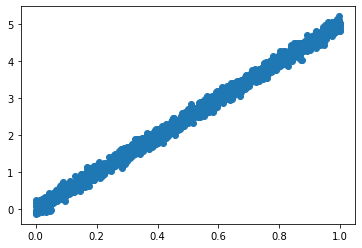

In [10]:
X = np.random.rand(1,2000)
Y = 5 * X + np.random.randn(1,2000)*0.1
plt.scatter(X,Y)

In [11]:
result = run_model(X,Y,0.01,1000,100)

Cost after 0 iterations is 8.784917366554708
Cost after 100 iterations is 1.0230967212358621
Cost after 200 iterations is 0.7556316166503676
Cost after 300 iterations is 0.5817209941438239
Cost after 400 iterations is 0.4485152738429605
Cost after 500 iterations is 0.34635687106013885
Cost after 600 iterations is 0.26800862379640367
Cost after 700 iterations is 0.2079210726598292
Cost after 800 iterations is 0.16183818083546705
Cost after 900 iterations is 0.12649586984535716


In [12]:
result['Slope']

3.980106288728193

In [13]:
result['Costs']

[8.784917366554708,
 1.0230967212358621,
 0.7556316166503676,
 0.5817209941438239,
 0.4485152738429605,
 0.34635687106013885,
 0.26800862379640367,
 0.2079210726598292,
 0.16183818083546705,
 0.12649586984535716]

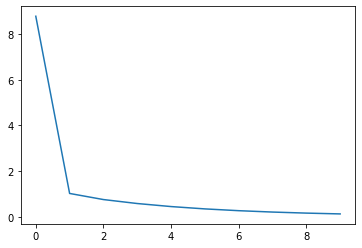

In [14]:
plt.plot(result['Costs'])

In [15]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


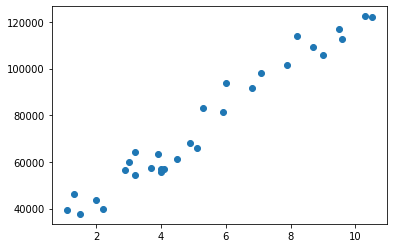

In [16]:
X = df[['YearsExperience']].values
Y = df[['Salary']].values
plt.scatter(X,Y)

In [17]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X[:] = mmc.fit_transform(X[:])
Y[:] = mmc.fit_transform(Y[:]) 

In [18]:
result = run_model(X,Y,0.01,20,2)

Cost after 0 iterations is 1.0
Cost after 2 iterations is 0.42326655769117116
Cost after 4 iterations is 0.1791545788597337
Cost after 6 iterations is 0.07583014188857094
Cost after 8 iterations is 0.032096363126408435
Cost after 10 iterations is 0.013585317134920803
Cost after 12 iterations is 0.005750210418840804
Cost after 14 iterations is 0.002433871769982647
Cost after 16 iterations is 0.001030176525942283
Cost after 18 iterations is 0.00043603927194983303


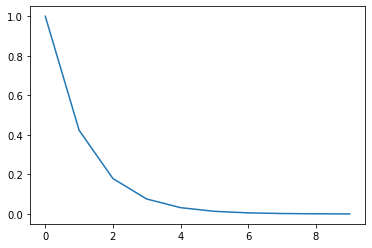

In [19]:
plt.plot(result['Costs'])

In [20]:
result['Costs']

[1.0,
 0.42326655769117116,
 0.1791545788597337,
 0.07583014188857094,
 0.032096363126408435,
 0.013585317134920803,
 0.005750210418840804,
 0.002433871769982647,
 0.001030176525942283,
 0.00043603927194983303]

In [21]:
print(result['Intercept'])

0.0
